In [2]:
%%capture
pip install geopandas

In [3]:
%%capture
pip install libpysal

In [4]:
%%capture
pip install pysal

In [5]:
%%capture
pip install giddy

In [6]:
%%capture
pip install esda

In [7]:
%%capture
pip install gudhi

In [8]:
%%capture
pip install pickle

In [9]:
%%capture
pip install gzip

In [35]:
%%capture
pip install open3d

In [45]:
%%capture
pip install plotly

**Start by reading in sample file and drafting a program to compile and clean data**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import geopandas as gpd
import pysal
import libpysal
import pysal.explore as explore
import seaborn as sns
from libpysal.weights import Queen, Rook, KNN
from libpysal.weights import lat2W
import giddy
import esda
import pickle
import gzip
import gudhi as gd
from mpl_toolkits.mplot3d import Axes3D
import open3d as o3d
import plotly


**California sample records 1980-2021**


In [11]:
ca_3 = pd.read_csv(r'/content/drive/MyDrive/hub_zone_dod/ca_time.csv')

In [12]:
ca_zip = gpd.read_file(r'/content/drive/MyDrive/Spatiotemp/final project/ca shapefiles/ca_zip.shp')

In [13]:
ca_shp = gpd.read_file(r'/content/drive/MyDrive/Spatiotemp/stars data/california.shp')

**Create point cloud of latitude, longitude, and time**

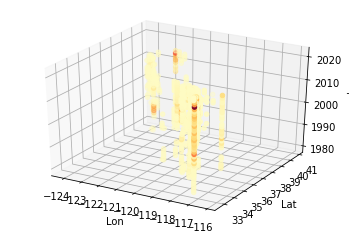

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = ca_3['x']
y = ca_3['y']
z = ca_3['Year']
val = ca_3['Action Obligation ($)']

ax.scatter(x, y, z, c=val, cmap='YlOrRd', marker='o')

ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_zlabel('T')

plt.show()

**Transform point cloud into simplical complex**

In [18]:
ca_ar = ca_3[['Year', 'x', 'y']].to_numpy()

In [19]:
skeleton = gd.RipsComplex(points = ca_ar, max_edge_length = 0.2)

In [27]:
Rips_simplex_tree_sample = skeleton.create_simplex_tree(max_dimension = 4)

In [28]:
Rips_simplex_tree_sample.dimension()

4

In [29]:
Rips_simplex_tree_sample.num_vertices()

879

In [30]:
Rips_simplex_tree_sample.num_simplices()

2927

In [31]:
rips_generator = Rips_simplex_tree_sample.get_filtration()

In [34]:
rips_list = list(rips_generator)
for splx in rips_list[0:-1] :
    print(splx)

**Point cloud data with Open3D**

In [40]:
pcd = o3d.geometry.PointCloud()

In [43]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(ca_ar[:,:3])
#pcd.colors = o3d.utility.Vector3dVector(ca_ar[:,3:4]/255)
#pcd.normals = o3d.utility.Vector3dVector(ca_ar[:,6:9])

In [44]:
distances = pcd.compute_nearest_neighbor_distance()
avg_dist = np.mean(distances)
radius = 3 * avg_dist

INFO - 2021-10-03 02:20:06,633 - utils - NumExpr defaulting to 2 threads.


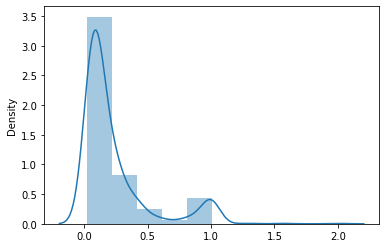

In [80]:
dist = pd.Series(distances)
sns.distplot(dist, bins=10)

In [78]:
#poisson_mesh = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(ca_ar, depth=8, width=0, scale=1.1)

**Interactive point clouds with Plotly**

In [70]:
trace1 = go.Scatter3d(
    x = ca_3['x'],
    y = ca_3['y'],
    z = ca_3['Year'],
    mode='markers',
    marker=dict(
        size=4,
        color=ca_3['Action Obligation ($)'],                
        colorscale='spectral',   
        opacity=0.8
        
    )
)

data = [trace1]
layout = go.Layout(
    scene = dict(
                    xaxis = dict(
                        title='lon'),
                    yaxis = dict(
                        title='lat'),
                    zaxis = dict(
                        title='time'),),
    margin=dict(
        r=20, b=10, l=10, t=10
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show()
#py.iplot(fig, filename='3d-scatter-colorscale')
#plotly.plot(fig, filename='/content/drive/MyDrive/hub_zone_dod/interactive_plt')
